In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#from matplotlib.pyplot import figure

print("matplotlib version: {}".format(matplotlib.__version__))
import mglearn
print("mglearn version: {}".format(mglearn.__version__))

#read the data file
path = './Fire_Call_Data/30k_data.csv'
%time df = pd.read_csv(path)


matplotlib version: 2.2.2
mglearn version: 0.1.6
CPU times: user 306 ms, sys: 44.8 ms, total: 351 ms
Wall time: 358 ms


In [151]:
print("df.shape =", df.shape)
df2 = df[['Call Type','Location','Neighborhooods - Analysis Boundaries']]
df2 = df2.rename(index=str, columns={"Call Type":"callType","Neighborhooods - Analysis Boundaries":"neighborhood"})
print("df2.shape =", df2.shape)
df2 = df2.copy()

df2.loc[:,'tmpcol'] = df2['Location'].map(lambda x: x.lstrip('(').rstrip(')'))

df2['LAT'] = df2['tmpcol'].str.split(',').str[0].astype(float)
df2['LON'] = df2['tmpcol'].str.split(',').str[1].astype(float)*-1
#df2['callType'] = df2['callType'].str

df2 = df2.drop('tmpcol',1)
df2 = df2.drop('Location',1)
print("\n df2.types",df2.dtypes)


#df['Fire Prevention District'].unique()
df['Neighborhooods - Analysis Boundaries'].unique()






df.shape = (30000, 34)
df2.shape = (30000, 3)

 df2.types callType         object
neighborhood     object
LAT             float64
LON             float64
dtype: object


array(['Marina', 'Tenderloin', 'Lone Mountain/USF', 'South of Market',
       'Financial District/South Beach', 'Mission', 'Sunset/Parkside',
       'Pacific Heights', 'Outer Mission', 'Inner Richmond', 'Chinatown',
       'Russian Hill', 'North Beach', 'Nob Hill', 'Japantown',
       'Bayview Hunters Point', 'Golden Gate Park', 'Mission Bay',
       'Noe Valley', 'Glen Park', 'Outer Richmond', 'West of Twin Peaks',
       'Castro/Upper Market', 'Inner Sunset', 'Lakeshore', 'Potrero Hill',
       'Western Addition', 'Haight Ashbury', 'Twin Peaks', 'Hayes Valley',
       'Treasure Island', 'Bernal Heights', 'Portola', 'Excelsior',
       'Lincoln Park', 'Presidio Heights', 'Presidio',
       'Visitacion Valley', 'Oceanview/Merced/Ingleside', 'McLaren Park',
       'None', 'Seacliff'], dtype=object)

In [152]:
typesOfCalls = pd.DataFrame(df2.callType.unique(),columns={"Types"})
typesOfCalls



,Types
0,Medical Incident
1,Structure Fire
2,Traffic Collision
3,Alarms
4,Outside Fire
5,Vehicle Fire
6,Elevator / Escalator Rescue
7,Citizen Assist / Service Call
8,Gas Leak (Natural and LP Gases)
9,Smoke Investigation (Outside)


Text(0.5,1,'Locations of all calls 30k records')

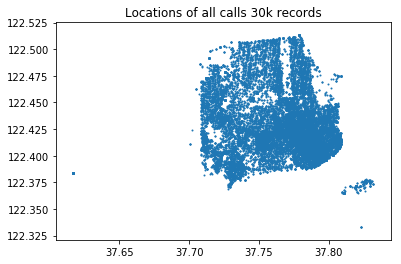

In [153]:
plt.scatter(df2.LAT,df2.LON,s=1)
plt.title("Locations of all calls 30k records")

shape:  (3848, 4)


Text(0.5,1,'Structure Fire calls 3848 records')

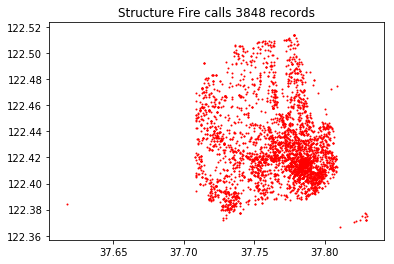

In [154]:
df3 = df2.loc[df2['callType'] == "Structure Fire"]
print("shape: ",df3.shape)
plt.scatter(df3.LAT,df3.LON,s=1,color='red')
plt.title("Structure Fire calls 3848 records")

shape:  (164, 4)


Text(0.5,1,'Water Resuce calls 164 records')

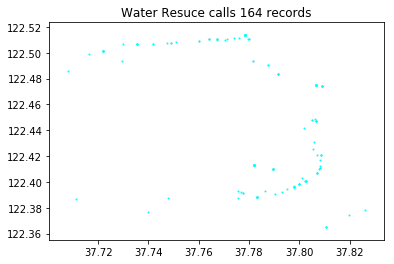

In [155]:

df4 = df2.loc[df2['callType'] == "Water Rescue"]
print("shape: ",df4.shape)
plt.scatter(df4.LAT,df4.LON,s=1,color='aqua')
plt.title("Water Resuce calls 164 records")






shape:  (1227, 4)


Text(0.5,1,'Traffic Collision calls ')

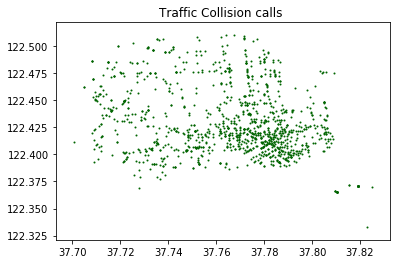

In [156]:
df5 = df2.loc[df2['callType'] == "Traffic Collision"]
print("shape: ",df5.shape)
plt.scatter(df5.LAT,df5.LON,s=1,color='darkgreen')
plt.title("Traffic Collision calls ")


Text(0.5,1,'Fire calls')

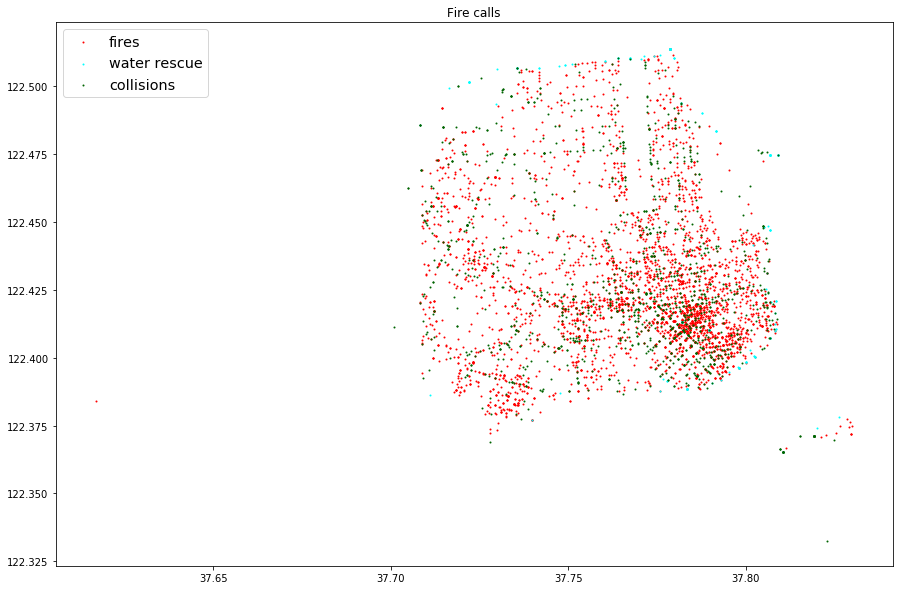

In [8]:
plt.figure(figsize=(15,10))
#plt.subplot(111)
#plt.scatter(df2.LAT,df2.LON,s=1)
#plt.title("Locations of all calls 30k records")

#plt.subplot(111)
df3 = df2.loc[df2['callType'] == "Structure Fire"]
plt.scatter(df3.LAT,df3.LON,s=1, color='red', label="fires")
#plt.title("Structure Fire calls 3848 records")

#plt.subplot(111)
plt.scatter(df4.LAT,df4.LON,s=1,color='aqua', label='water rescue')
#plt.title("Water Resuce calls 164 records")

#plt.subplot(111)
plt.scatter(df5.LAT,df5.LON,s=1,color='darkgreen', label="collisions")
#plt.title("Traffic Collision calls ")

plt.legend(loc='upper left',ncol=1,fontsize='x-large')
plt.title("Fire calls")



In [197]:
#df5mission = df2.loc[df2['callType' == "Traffic Collision" & 'neighborhood' == "Mission"]]
df5mission = df2.loc[df2['callType'] == "Traffic Collision"]
df5mission = df2.loc[df2['neighborhood'] == "Mission"]
df5mission = df5mission.drop('callType',1)
df5mission = df5mission.drop('neighborhood',1)
df5mission




,LAT,LON
6,37.767070,122.413260
12,37.752239,122.418445
14,37.773218,122.421522
30,37.764236,122.419660
44,37.756969,122.420011
50,37.752991,122.406814
96,37.748520,122.420247
99,37.764313,122.426194
109,37.766134,122.421935
123,37.752059,122.408044


Text(37.7,122.29,'[[ 37.74970437 122.46633991]\n [ 37.77329932 122.411705  ]]')

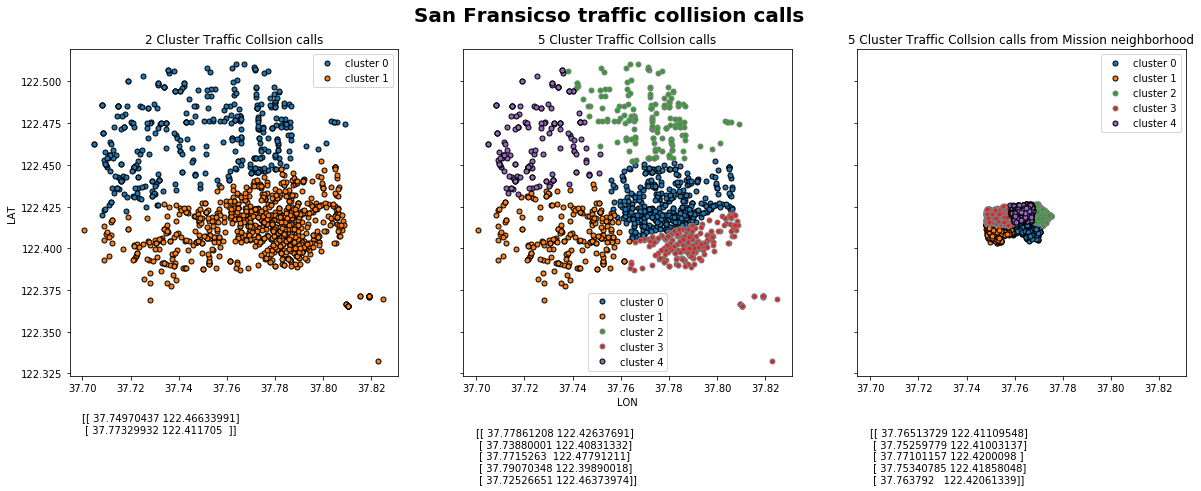

In [332]:
df5 = df2.loc[df2['callType'] == "Traffic Collision"]
df5 = df5.drop('callType',1)
df5 = df5.drop('neighborhood',1)


X = df5.values
X_Mission = df5mission.values

#fig,  axes  =  plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True )
fig,  (ax1,ax2,ax3)  =  plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True )

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

#mglearn.discrete_scatter(X[:, 0], X[:, 1],  assignments,markers='.', ax=axes[0])
mglearn.discrete_scatter(X[:, 0], X[:, 1],  assignments,markers='.', ax=ax1)
ax1.legend(["cluster 0","cluster 1"],loc='best')
ax2.set_xlabel("LON")
ax1.set_ylabel("LAT")
twoclusterCenter = kmeans.cluster_centers_


# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

#mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, markers='.', ax=axes[1])
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, markers='.', ax=ax2)
ax2.legend(["cluster 0","cluster 1","cluster 2","cluster 3","cluster 4"],loc='best')
fiveclusterCenter = kmeans.cluster_centers_

# using five cluster centers with only Mission Calls
X=X_Mission
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

#mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, markers='.', ax=axes[2])
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, markers='.', ax=ax3)
ax3.legend(["cluster 0","cluster 1","cluster 2","cluster 3","cluster 4"],loc='best')
fiveclusterCenterMission = kmeans.cluster_centers_

ax2.set_title("5 Cluster Traffic Collsion calls")
ax1.set_title("2 Cluster Traffic Collsion calls")
ax3.set_title("5 Cluster Traffic Collsion calls from Mission neighborhood")
fig.suptitle("San Fransicso traffic collision calls",fontsize=20,fontweight="bold")

ax3.text(37.70,122.26,fiveclusterCenterMission)
ax2.text(37.70,122.26,fiveclusterCenter)
ax1.text(37.70,122.29,twoclusterCenter)









	Cluster anlysis on Structure Fire calls 


lat min 37.6168823239251
lat max 37.82999157471
lon min 122.36673920427
lon max 122.513648358636

2  Cluster Centers:
 [[ 37.77412458 122.41407895]
 [ 37.7481272  122.46183674]]

5 Cluster Centers:
 [[ 37.78769477 122.41044362]
 [ 37.77540421 122.43370294]
 [ 37.72369082 122.44981498]
 [ 37.73960451 122.40304269]
 [ 37.76599955 122.48295616]]


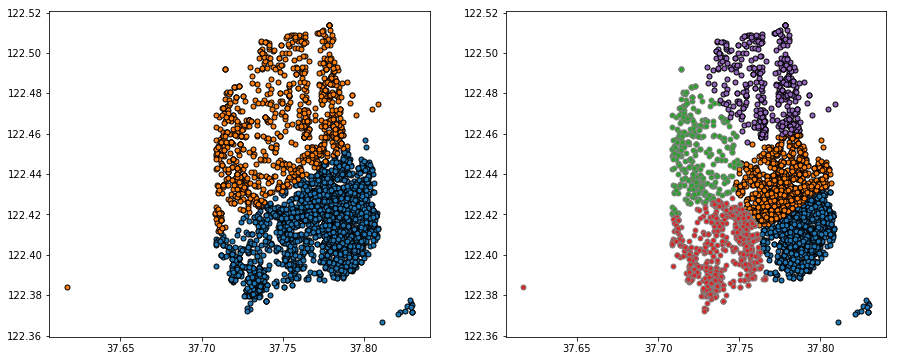

In [336]:

df3 = df2.loc[df2['callType'] == "Structure Fire"]
df3 = df3.drop('callType',1)
df3 = df3.drop('neighborhood',1)

X = df3.values

print("\n\tCluster anlysis on Structure Fire calls \n\n")
print('lat min',df3.LAT.min())
print('lat max',df3.LAT.max())
print('lon min',df3.LON.min())
print('lon max',df3.LON.max())


fig,  axes  =  plt.subplots(1, 2, figsize=(15, 6))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1],  assignments,markers='.', ax=axes[0])
twoclusterCenter = kmeans.cluster_centers_


# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, markers='.', ax=axes[1])
fiveclusterCenter = kmeans.cluster_centers_

print('\n2  Cluster Centers:\n',twoclusterCenter)
print('\n5 Cluster Centers:\n',fiveclusterCenter)


In [343]:
df4 = df2.loc[df2['callType'] == "Water Rescue"]
#X = df4.drop('callType',1).values
#X = df4['LAT','LON'].values
tmp = df4[['LAT','LON']].values
tmp

array([[ 37.72207829, 122.50172082],
       [ 37.77663139, 122.39218945],
       [ 37.79804495, 122.39636708],
       [ 37.77848511, 122.51364836],
       [ 37.80675821, 122.44691622],
       [ 37.7894751 , 122.41040616],
       [ 37.73546976, 122.50671743],
       [ 37.76400083, 122.51034132],
       [ 37.7713425 , 122.51105375],
       [ 37.80675821, 122.44691622],
       [ 37.78202244, 122.41305415],
       [ 37.80692014, 122.40717016],
       [ 37.74911094, 122.50794155],
       [ 37.77571986, 122.38765199],
       [ 37.8066582 , 122.47471662],
       [ 37.77848511, 122.51364836],
       [ 37.77848511, 122.51364836],
       [ 37.77848511, 122.51364836],
       [ 37.77848511, 122.51364836],
       [ 37.77848511, 122.51364836],
       [ 37.77848511, 122.51364836],
       [ 37.80675821, 122.44691622],
       [ 37.81052072, 122.36513827],
       [ 37.73546976, 122.50671743],
       [ 37.7894751 , 122.41040616],
       [ 37.8066582 , 122.47471662],
       [ 37.76027169, 122.50938162],
 


	Cluster anlysis on Water Rescue calls 


lat min 37.7080857299394
lat max 37.8262198186734
lon min 122.365138272289
lon max 122.513648358636

2  Cluster Centers:
 [[ 37.77044146 122.49965258]
 [ 37.79324915 122.40552245]]

5 Cluster Centers:
 [[ 37.79649694 122.40806923]
 [ 37.77527514 122.50993336]
 [ 37.80462461 122.46796834]
 [ 37.73161224 122.50346218]
 [ 37.78130779 122.38519166]]


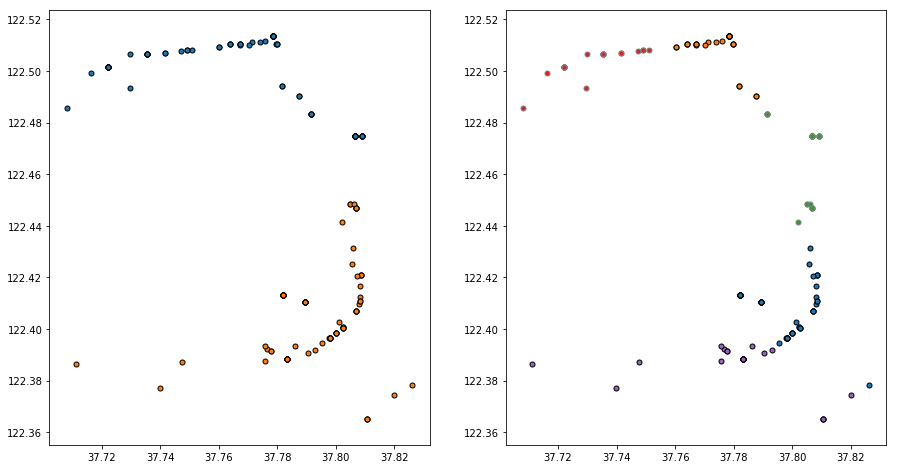

In [344]:
df4 = df2.loc[df2['callType'] == "Water Rescue"]
X = df4[['LAT','LON']].values

print("\n\tCluster anlysis on Water Rescue calls \n\n")
print('lat min',df4.LAT.min())
print('lat max',df4.LAT.max())
print('lon min',df4.LON.min())
print('lon max',df4.LON.max())


fig,  axes  =  plt.subplots(1, 2, figsize=(15, 8))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1],  assignments,markers='.', ax=axes[0])
twoclusterCenter = kmeans.cluster_centers_


# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, markers='.', ax=axes[1])
fiveclusterCenter = kmeans.cluster_centers_

print('\n2  Cluster Centers:\n',twoclusterCenter)
print('\n5 Cluster Centers:\n',fiveclusterCenter)